#### Mesure du Flux au niveau de l'échantillon sur Polyphem

- Utilisation de la sonde AXUV100, réglage du gain du phantom sur $10^8$ en mode **Low**
- Synchrotron: 450 Ma
- Mesures effectuées à la main avec le multimètre le 14/09/2023

- Les fentes sont à 0.65 et 0.65 sur l'interface MicroManager
- Au 10x

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as p

In [2]:
%mkdir data
%mkdir figures

mkdir: impossible de créer le répertoire « data »: Le fichier existe
mkdir: impossible de créer le répertoire « figures »: Le fichier existe


## Numérisation des données

In [6]:
GainPhantom = 1e-8
W = list(range(200, 340+5, 5))
V = [8.4e-3,
     4.98e-2,
     1.03e-1,
     1.89e-1,
     4.21e-1,
     6.92e-1,
     1.06,
     1.55,
     2.05,
     2.43,
     3.03,
     3.90,
     4.61,
     5.33,
     5.90,
     5.97,
     5.50,
     4.42,
     2.85,
     1.49,
     6.07e-1,
     4.48e-1,
     3.77e-1,
     2.81e-1,
     2.70e-1,
     3.42e-1,
     4.12e-1,
     4.25e-1,
     3.83e-1,
]

data = p.DataFrame({'W (nm)': W, 
                    'V (V)': V
                   })
data.to_csv('./data/data_diode_polypheme_14092023_sample.csv')
data

W (nm)   V (V)
0      200  0.0084
1      205  0.0498
2      210  0.1030
3      215  0.1890
4      220  0.4210
5      225  0.6920
6      230  1.0600
7      235  1.5500
8      240  2.0500
9      245  2.4300
10     250  3.0300
11     255  3.9000
12     260  4.6100
13     265  5.3300
14     270  5.9000
15     275  5.9700
16     280  5.5000
17     285  4.4200
18     290  2.8500
19     295  1.4900
20     300  0.6070
21     305  0.4480
22     310  0.3770
23     315  0.2810
24     320  0.2700
25     325  0.3420
26     330  0.4120
27     335  0.4250
28     340  0.3830

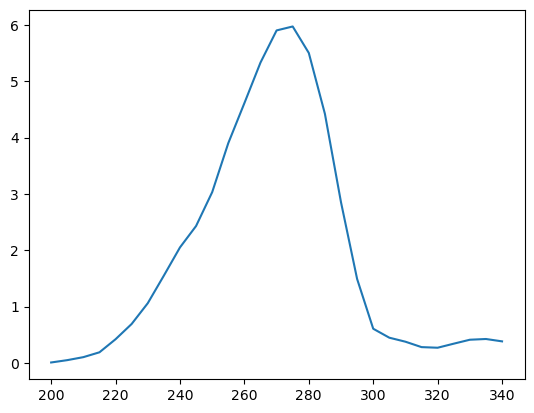

In [5]:
plt.plot(data['W (nm)'], data['V (V)'])

## Chargement des courbes de calibration de la diode

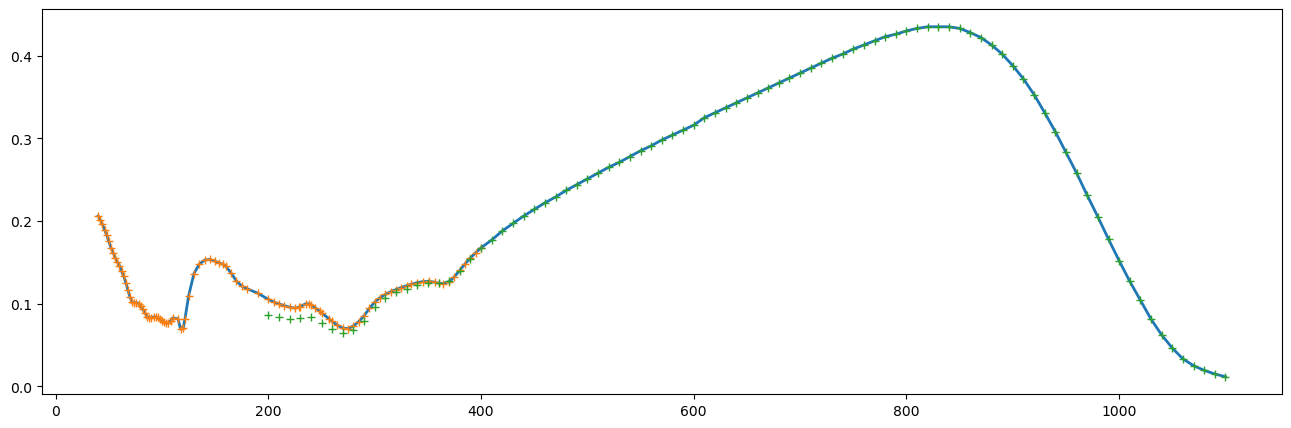

In [7]:
calibUV = p.read_csv('./data/calibration_sonde_AXUV100/AXUV_calibration_40-400nm.csv', skiprows=4, names=('W (nm)', 'R (A/W)'))
calibVIS = p.read_csv('./data/calibration_sonde_AXUV100/AXUV_calibration_200-1100nm.csv', skiprows=4, names=('W (nm)', 'reflectance', 'R (A/W)', 'External QR', 'Internal QE'))

# On met ensemble les deux séries on prend calibUV puis à la fin on enchaine sur calibVIS
calibMerged = p.concat((calibUV, calibVIS[calibVIS['W (nm)'] > calibUV['W (nm)'].max()]))

# Plot pour voir 
plt.figure(figsize=(16,5))
plt.plot(calibMerged['W (nm)'], calibMerged['R (A/W)'], '-', lw=2)
plt.plot(calibUV['W (nm)'], calibUV['R (A/W)'], '+')
plt.plot(calibVIS['W (nm)'], calibVIS['R (A/W)'], '+')

## Convertion des données pour avoir l'intensité, la puissance et le Flux

- Le flux de photons $\phi$ unité $\frac{photons}{s\, m^2}$ soit des photons par second métres carrés
$$ H = \phi \times \frac{hc}{\lambda}$$
Avec $H$ la puissance par mètre carré $[W/m^2]$, $h$ la constant de Plank, $c$ la célérité de la lumière, et $\lambda$ la longueur d'onde

In [8]:
# Pour avoir le courant I en ampère
data['I (A)'] = data['V (V)'] * GainPhantom

# Pour avoir la puissance (on utilise la calibration que l'on interpole lineairement au bonnes longueus d'ondes)
calib = np.interp(data['W (nm)'], calibMerged['W (nm)'], calibMerged['R (A/W)'])
data['P (W)'] = data['I (A)'] / calib

h = 6.62e-34
c = 2.99e8
data['Flux'] = ( data['P (W)'] * data['W (nm)'] * 10e-9 ) / (c*h)

data.to_csv('./data/data_flux_polypheme_14092023_sample.csv')
data

W (nm)   V (V)         I (A)         P (W)          Flux
0      200  0.0084  8.400000e-11  7.984791e-10  8.067972e+09
1      205  0.0498  4.980000e-10  4.882353e-09  5.056545e+10
2      210  0.1030  1.030000e-09  1.033099e-08  1.096055e+11
3      215  0.1890  1.890000e-09  1.938462e-08  2.105554e+11
4      220  0.4210  4.210000e-09  4.399164e-08  4.889491e+11
5      225  0.6920  6.920000e-09  7.315011e-08  8.315116e+11
6      230  1.0600  1.060000e-08  1.099585e-07  1.277696e+12
7      235  1.5500  1.550000e-08  1.553106e-07  1.843911e+12
8      240  2.0500  2.050000e-08  2.077001e-07  2.518366e+12
9      245  2.4300  2.430000e-08  2.578790e-07  3.191927e+12
10     250  3.0300  3.030000e-08  3.408324e-07  4.304787e+12
11     255  3.9000  3.900000e-08  4.659803e-07  6.003142e+12
12     260  4.6100  4.610000e-08  5.865140e-07  7.704111e+12
13     265  5.3300  5.330000e-08  7.213991e-07  9.658113e+12
14     270  5.9000  5.900000e-08  8.404558e-07  1.146435e+13
15     275  5.9700  5.970000e-08  8.553009e-07  1.188290e+13
16     280  5.5000  5.500000e-08  7.523940e-07  1.064325e+13
17     285  4.4200  4.420000e-08  5.644955e-07  8.127860e+12
18     290  2.8500  2.850000e-08  3.337237e-07  4.889403e+12
19     295  1.4900  1.490000e-08  1.580064e-07  2.354873e+12
20     300  0.6070  6.070000e-09  5.962672e-08  9.037181e+11
21     305  0.4480  4.480000e-09  4.175210e-08  6.433524e+11
22     310  0.3770  3.770000e-09  3.390288e-08  5.309689e+11
23     315  0.2810  2.810000e-09  2.456294e-08  3.908964e+11
24     320  0.2700  2.700000e-09  2.305722e-08  3.727586e+11
25     325  0.3420  3.420000e-09  2.861925e-08  4.699075e+11
26     330  0.4120  4.120000e-09  3.385374e-08  5.644057e+11
27     335  0.4250  4.250000e-09  3.436489e-08  5.816083e+11
28     340  0.3830  3.830000e-09  3.054226e-08  5.246274e+11

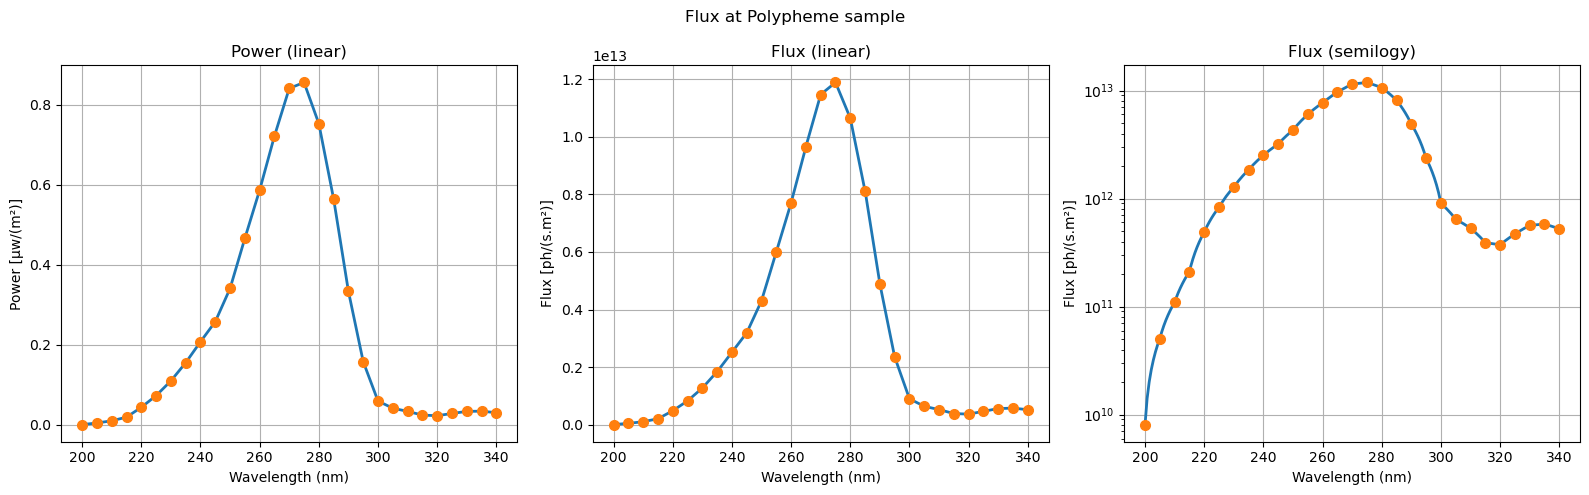

In [10]:
x = np.linspace(data['W (nm)'].min(), data['W (nm)'].max(), 200)
fit = np.interp(x, data['W (nm)'], data['Flux'])

plt.figure(figsize=(16,5))
plt.subplot(131)
plt.plot(data['W (nm)'], data['P (W)']*1e6, '-', lw=2)
plt.plot(data['W (nm)'], data['P (W)']*1e6, 'o', ms=7)
plt.grid()
plt.ylabel('Power [µw/(m²)]')
plt.xlabel('Wavelength (nm)')
plt.title('Power (linear)')

plt.subplot(132)
plt.plot(x, fit, lw=2)
plt.plot(data['W (nm)'], data['Flux'], 'o', ms=7)
plt.grid()
plt.ylabel('Flux [ph/(s.m²)]')
plt.xlabel('Wavelength (nm)')
plt.title('Flux (linear)')

plt.subplot(133)
plt.semilogy(x, fit, lw=2)
plt.semilogy(data['W (nm)'], data['Flux'], 'o', ms=7)
plt.grid()
plt.ylabel('Flux [ph/(s.m²)]')
plt.xlabel('Wavelength (nm)')
plt.title('Flux (semilogy)')

plt.suptitle('Flux at Polypheme sample')
plt.tight_layout()

plt.savefig('./figures/Flux_Polypheme_14092023_sample.pdf')
plt.savefig('./figures/Flux_Polypheme_14092023_sample.png')